<a href="https://colab.research.google.com/github/patchikoooo/data-science-from-scratch/blob/master/patch/GradientDescent_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent**

"Those who boast about their descent, brag on what they owe to others."
-- Seneca

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/data-science-from-scratch/libraries')

In [0]:
import os
from functools import partial
from linear_algebra import Vector, dot

In [0]:
# function that takes as input a vector of real numbers and outputs a single real number:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    #return sum(v_i ** 2 for v_i in v)
    return dot(v, v)

# We frequently need to maximize(or minimize) such functions. That is, we need to
#       find the input v that produces the largest(or smallest) possible value.

# One approach to maximizing a function is to pick a random starting point,
#       compute the gradient, take a small step in the direction of the gradien
#       (i.e, the direction that causes the cuntion to increase the most).
#       and repeat with the new starting point. Similarly, you can try to
#       minimize a function by taking small steps in the opposite direction

### NOTE:
# If a function has a unique global minimum, this procedure is likely to find it.
#       If a function has multiple(local) minima, this procedure might "find" the
#       wrong one of them, in which case you might re-run the procedure from
#       a variety of starting points. If a function has no minimum, then it's
#       possible the procedure might go on forever.

In [0]:
""" ESTIMATING THE GRADIENT
If f is a function of one variable, its derivative at a point x measures how
        f(x) changes when we make a very small change to x. It is defined as the
        limit of the difference qoutients: """
from typing import Callable

def difference_qoutient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    # this is a function to get the derivative of the function
    return ( f(x+h) - f(x) ) / h # as h approches 0


In [0]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

In [0]:
import random
from linear_algebra import distance, add, scalar_multiply

In [0]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """ Moves 'step_size in the 'gradient' direction from `v` """
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept       # The prediction of the model
    error = (predicted - y)                 # error is (predicted - actual)
    squared_error = error ** 2              # We'll minimize squared error
    grad = [2 * error * x, 2 * error]       # using its gradient
    return grad

In [0]:
from typing import TypeVar, List, Iterator
T = TypeVar('T')    # this allows us to type "generic functions"

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """ Generated 'batch_size' -sized minibatches from the dataset """
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts) # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [0]:
### NOTE:
# We can't take limits in python
# But we can estimate derivatives by evaluating the difference quotient for
#       a very small e.

#derivative_estimate = partial(difference_qoutient, square, h=0.00001)


[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[-19.999998983166734, -17.999998988216248, -15.99999900037119, -13.999999005420705, -11.999999003364792, -9.999999001308879, -7.999999001029323, -5.999999000749767, -3.999998999582033, -1.999999000079633, 1e-06, 2.0000009999243673, 4.0000010006480125, 6.000001000927568, 8.000000999430767, 10.00000100148668, 12.00000099998988, 14.000001002045792, 16.000000982785423, 18.000000991946763]


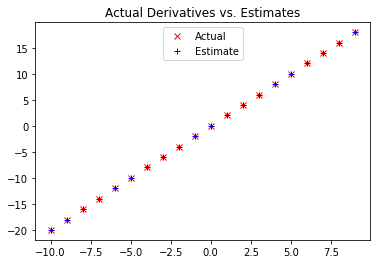

In [10]:
# plot to show they're basically the same
from matplotlib import pyplot as plt
x = range(-10, 10)
actual = [derivative(i) for i in x]
print(actual)
estimates = [difference_qoutient(square, i, h=0.000001) for i in x]
#derestx = [derivative_estimate(i) for i in x]
print(estimates)

plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, actual, 'rx', label='Actual')               # red x
plt.plot(x, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()

In [0]:
# When f is a function of many varibales, it has multiple partial derivatives,
#       each indicating how f changes when we make small changes in just one of
#       input variables.

# We calculate its ith partial derivative by treating it as a function of just
#       its ith variable, holding the other variables fixed:

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """compute the ith partial difference quotient of f at v"""
    # add h to just the ith element of v
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]

    # we get the vector change in the specified axis i
    return ( f(w) - f(v) ) / h
    
# after which, we can estimate the gradient the same way:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.00001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

### NOTE
# A major drawback to this "estimate using difference quotients" approach is that
#       it's computationally expensive. If v has length n, estimate_gradient
#       has to evaluate f on 2n different inputs. If you're repeatedly estimating
#       gradients, you're doing a whole lot of extra work

**Using the Gradient**

It's easy to see htat the sum_of_squares is smallest when its input v is a vector of zeroes. But imagine we didn't know that. Let's use gradients to find the minimum among all three-dimentional vectors. We'll just pick a random starting point and then take tiny steps in the opposite direction of the graedient until we reach a point where the gradient is very small.

In [0]:
def gradient_step(v: Vector,
                  gradient: Vector,
                  step_size: float) -> Vector:
    """move step_size in the direction from v"""

    """ Here, we are getting a new value for the weight of the error.
            This might mean the m and b of the function error """
    
    #return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]
    assert len(v) == len(gradient)  # Make sure that vectors have the same size
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [13]:
""" EXAMPLE """
# Pick a random starting point
v = [random.randint(-10, 10) for i in range(3)] # 3 dimensional vector
tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = gradient_step(v, gradient, -0.01)       # take a negative gradient step
    if distance(next_v, v) < tolerance:      # stop if we're converging
        break
    v = next_v
print(v)
##sum_of_squares_gradient(v)

[9.067398886847253e-07, 3.6269595547389013e-06, -3.1735896103965395e-06]


In [14]:
""" Choosing the Right Step Size
Although the rationale for moving against the gradient is clear, how far
        to move is not. Indeed, choosing the right step size is more of an art
        than a science. Popular options include:

    # Using a fixed step size
    # Gradually shrinking the step size over time
    # At each step, choosing the step size that minimizes the value of the
            objective function
    
The last sounds optimal but is, in practive, a costly computation. We can
        approximate it by trying a variety of step sizes and choosing the one
        that results in the smallest value of the objective function: """

        #page 150




' Choosing the Right Step Size\nAlthough the rationale for moving against the gradient is clear, how far\n        to move is not. Indeed, choosing the right step size is more of an art\n        than a science. Popular options include:\n\n    # Using a fixed step size\n    # Gradually shrinking the step size over time\n    # At each step, choosing the step size that minimizes the value of the\n            objective function\n    \nThe last sounds optimal but is, in practive, a costly computation. We can\n        approximate it by trying a variety of step sizes and choosing the one\n        that results in the smallest value of the objective function: '

In [0]:
""" It is possible that certain step sizes will result in invalid inputs for
        our function. So we'll need to create a "safe apply" function that returns
        infinity(which should never be the minimum of anything) for invalid
        inputs. """

def safe(f):
    """ return a new function that's the same as f, except that if outputs
            infinity whenever f produces an error """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # this means infinity in python
    
    return safe_f

# **Putting it all Together**
In the general case, we have some target_fn that we want to minimize, and we also have its gradient_fn.

For example, the target_fn could represent the errors in a model as a function of its parameters, and we might want to find the parameters that make the errors as small as possible.

In [0]:
# Furthermore, let's say we have (somehow) chosen a starting value for the
#       parameters theta_0. Then we can implement gradient descent as:

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    # use gradient descent to find theta that minimizes the target function

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.0001, 0.00001]

    theta = theta_0                     # set theta to initial value
    target_fn = safe(target_fn)         # safe version of target_fn
    value = target_fn(theta)            # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [gradient_step(theta, gradient, -step_size)
                        for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

# We called it minimize_batch because, for each gradient step, it looks at the
#       entire data set (because target_fn returns the error on the whole data set)
#       In the next section, we'll see an alternative approach that only looks
#       at one data point at a time.

# Sometimes we'll instead want to maximize a function, which we can do by
#       minimizing its negative(which has a corresponding negative gradient): 

In [0]:
 def negate(f):
     """ returns a function that for any input x returns -f(x)"""
     return lambda *args, **kwags: -f(*args, **kwargs)

def negate_all(f):
    """ the same when f returns a list of numbers """
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn).
                          theta_0,
                          tolerance)

**Stochastic Gradient Descent**
As we mentioned before, often we'll be using gradient descent to choose the parameters of a model in a way that minimizes some notion of error. Using the precious batch approach, each gradient step requires us to make a prediction and compute the gradient for the whole data set, which makes each step take a long time.

In [0]:
""" Now, usually these error functions are additive, which means that the
        predictive error on the whole data set is simply the sum of the
        predictive errors for each data point.

    When this is the case, we can instead apply a technique called stochastic
        gradient descent, which computes the gradient (and takes a step) for only
        one point at a time. It cycles over our data repeatedly until it reaches
        a stopping point. """

# During each cycle, we'll want to iterate through our data in a random order:
def in_random_order(data):
    """ generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]   # create a list of indexes
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

# And we'll want to take a gradient step for each data point. This approach
#       leaves the possibility that we might circle around near a minimum forever,
#       so whenever we stop getting improvement we'll decrease the step size and
#       eventually quit:

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0         # initial guess
    alpha = alpha_0         # initial step size
    min_theta, min_value = None, float("inf")       # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta ) for x_i, y_i in data)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
        else:
            # otherwise we're not impoving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta


In [0]:
# The stochastic version will typically be alot faster than the batch version
#       Of course, we'll want a version that maximizes as well:

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

***For Further Explanation***



*   Keep reading! We'll be using gradient descent to solve problems throughout the rest of the book
*   At this point, you're undoubtedly sick of me recommending that you read textbooks. If it's any consolation, [Active Calculus](http://gvsu.edu/s/xr/) seems nicer that the calculus textbooks I learned from.

* scikit-learn has a [Stochastic Gradient Descent module](https://scikit-learn.org/stable/modules/sgd.html) that is not as general as ours in some ways and more general in other ways. Really, though, in most real-world situations you'll be using libraries in which the optimization is already taken care of behind the scences, and you won't have to worry about it yourself ( other than when it doesn't work correctly, which one day, inevitably, it won't)

